In [21]:
import pandas as pd
import numpy as np

# Make copies of relevant datasets
sales = dfs['sales'].copy()
purchases = dfs['purchases'].copy()

# -------------------------------
# 1️⃣ ABC Analysis
# -------------------------------
# Compute annual sales value per product
sales['SalesValue'] = sales['SalesQuantity'] * sales['SalesPrice']
product_sales = sales.groupby(['Brand', 'Description']).agg({
    'SalesValue': 'sum'
}).reset_index()

# Sort by SalesValue descending
product_sales = product_sales.sort_values(by='SalesValue', ascending=False)

# Compute cumulative percentage
product_sales['CumulativePerc'] = 100 * product_sales['SalesValue'].cumsum() / product_sales['SalesValue'].sum()

# Assign ABC category
def abc_category(row):
    if row['CumulativePerc'] <= 70:
        return 'A'
    elif row['CumulativePerc'] <= 90:
        return 'B'
    else:
        return 'C'

product_sales['ABC'] = product_sales.apply(abc_category, axis=1)

print("\n✅ ABC Analysis Complete: Top 10 Products")
display(product_sales.head(10))

# -------------------------------
# 2️⃣ Economic Order Quantity (EOQ)
# -------------------------------
# EOQ formula: sqrt((2 * Demand * OrderingCost) / HoldingCost)
# Assumptions:
ORDERING_COST = 50     # per order in $
HOLDING_COST = 5       # per unit per year in $

# Estimate annual demand per product
product_sales = product_sales.merge(
    sales.groupby(['Brand', 'Description'])['SalesQuantity'].sum().reset_index(),
    on=['Brand', 'Description'],
    how='left'
)

product_sales['EOQ'] = np.sqrt((2 * product_sales['SalesQuantity'] * ORDERING_COST) / HOLDING_COST)

print("\n✅ EOQ Calculated for Top 10 Products")
display(product_sales[['Brand', 'Description', 'SalesQuantity', 'EOQ']].head(10))

# -------------------------------
# 3️⃣ Reorder Point (ROP)
# -------------------------------
# ROP formula: Average Daily Demand * Lead Time
# Assumptions:
LEAD_TIME_DAYS = 7  # Average supplier lead time

# Average daily demand
product_sales['AvgDailyDemand'] = product_sales['SalesQuantity'] / 365
product_sales['ReorderPoint'] = product_sales['AvgDailyDemand'] * LEAD_TIME_DAYS

print("\n✅ Reorder Point Calculated for Top 10 Products")
display(product_sales[['Brand', 'Description', 'AvgDailyDemand', 'ReorderPoint']].head(10))



✅ ABC Analysis Complete: Top 10 Products


,Brand,Description,SalesValue,CumulativePerc,ABC
1655,4261,Capt Morgan Spiced Rum,444810.74,1.342242,A
1309,3545,Ketel One Vodka,357759.17,2.421802,A
440,1233,Jack Daniels No 7 Black,344712.22,3.461991,A
2520,8068,Absolut 80 Proof,288135.11,4.331455,A
1237,3405,Tito's Handmade Vodka,275162.97,5.161776,A
1485,3858,Grey Goose Vodka,225014.22,5.840769,A
826,2589,Jameson Irish Whiskey,191669.51,6.419143,A
1635,4227,Bacardi Superior Rum Trav,183659.91,6.973348,A
489,1376,Jim Beam,169922.38,7.486098,A
823,2585,Jameson Irish Whiskey,164426.60,7.982265,A



✅ EOQ Calculated for Top 10 Products


,Brand,Description,SalesQuantity,EOQ
0,4261,Capt Morgan Spiced Rum,20226,636.018868
1,3545,Ketel One Vodka,11883,487.503846
2,1233,Jack Daniels No 7 Black,9578,437.675679
3,8068,Absolut 80 Proof,11189,473.053908
4,3405,Tito's Handmade Vodka,9203,429.022144
5,3858,Grey Goose Vodka,9378,433.081978
6,2589,Jameson Irish Whiskey,4649,304.926221
7,4227,Bacardi Superior Rum Trav,10209,451.862811
8,1376,Jim Beam,7362,383.718647
9,2585,Jameson Irish Whiskey,6940,372.558720



✅ Reorder Point Calculated for Top 10 Products


,Brand,Description,AvgDailyDemand,ReorderPoint
0,4261,Capt Morgan Spiced Rum,55.413699,387.895890
1,3545,Ketel One Vodka,32.556164,227.893151
2,1233,Jack Daniels No 7 Black,26.241096,183.687671
3,8068,Absolut 80 Proof,30.654795,214.583562
4,3405,Tito's Handmade Vodka,25.213699,176.495890
5,3858,Grey Goose Vodka,25.693151,179.852055
6,2589,Jameson Irish Whiskey,12.736986,89.158904
7,4227,Bacardi Superior Rum Trav,27.969863,195.789041
8,1376,Jim Beam,20.169863,141.189041
9,2585,Jameson Irish Whiskey,19.013699,133.095890


C:\Users\91999\AppData\Local\Temp\ipykernel_280\4073165789.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['red','orange','green'], ax=axes[0,0])
C:\Users\91999\AppData\Local\Temp\ipykernel_280\4073165789.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=product_sales, x='ABC', y='SalesValue', palette=['red','orange','green'], ax=axes[0,1])
C:\Users\91999\AppData\Local\Temp\ipykernel_280\4073165789.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='EOQ', y='Produ

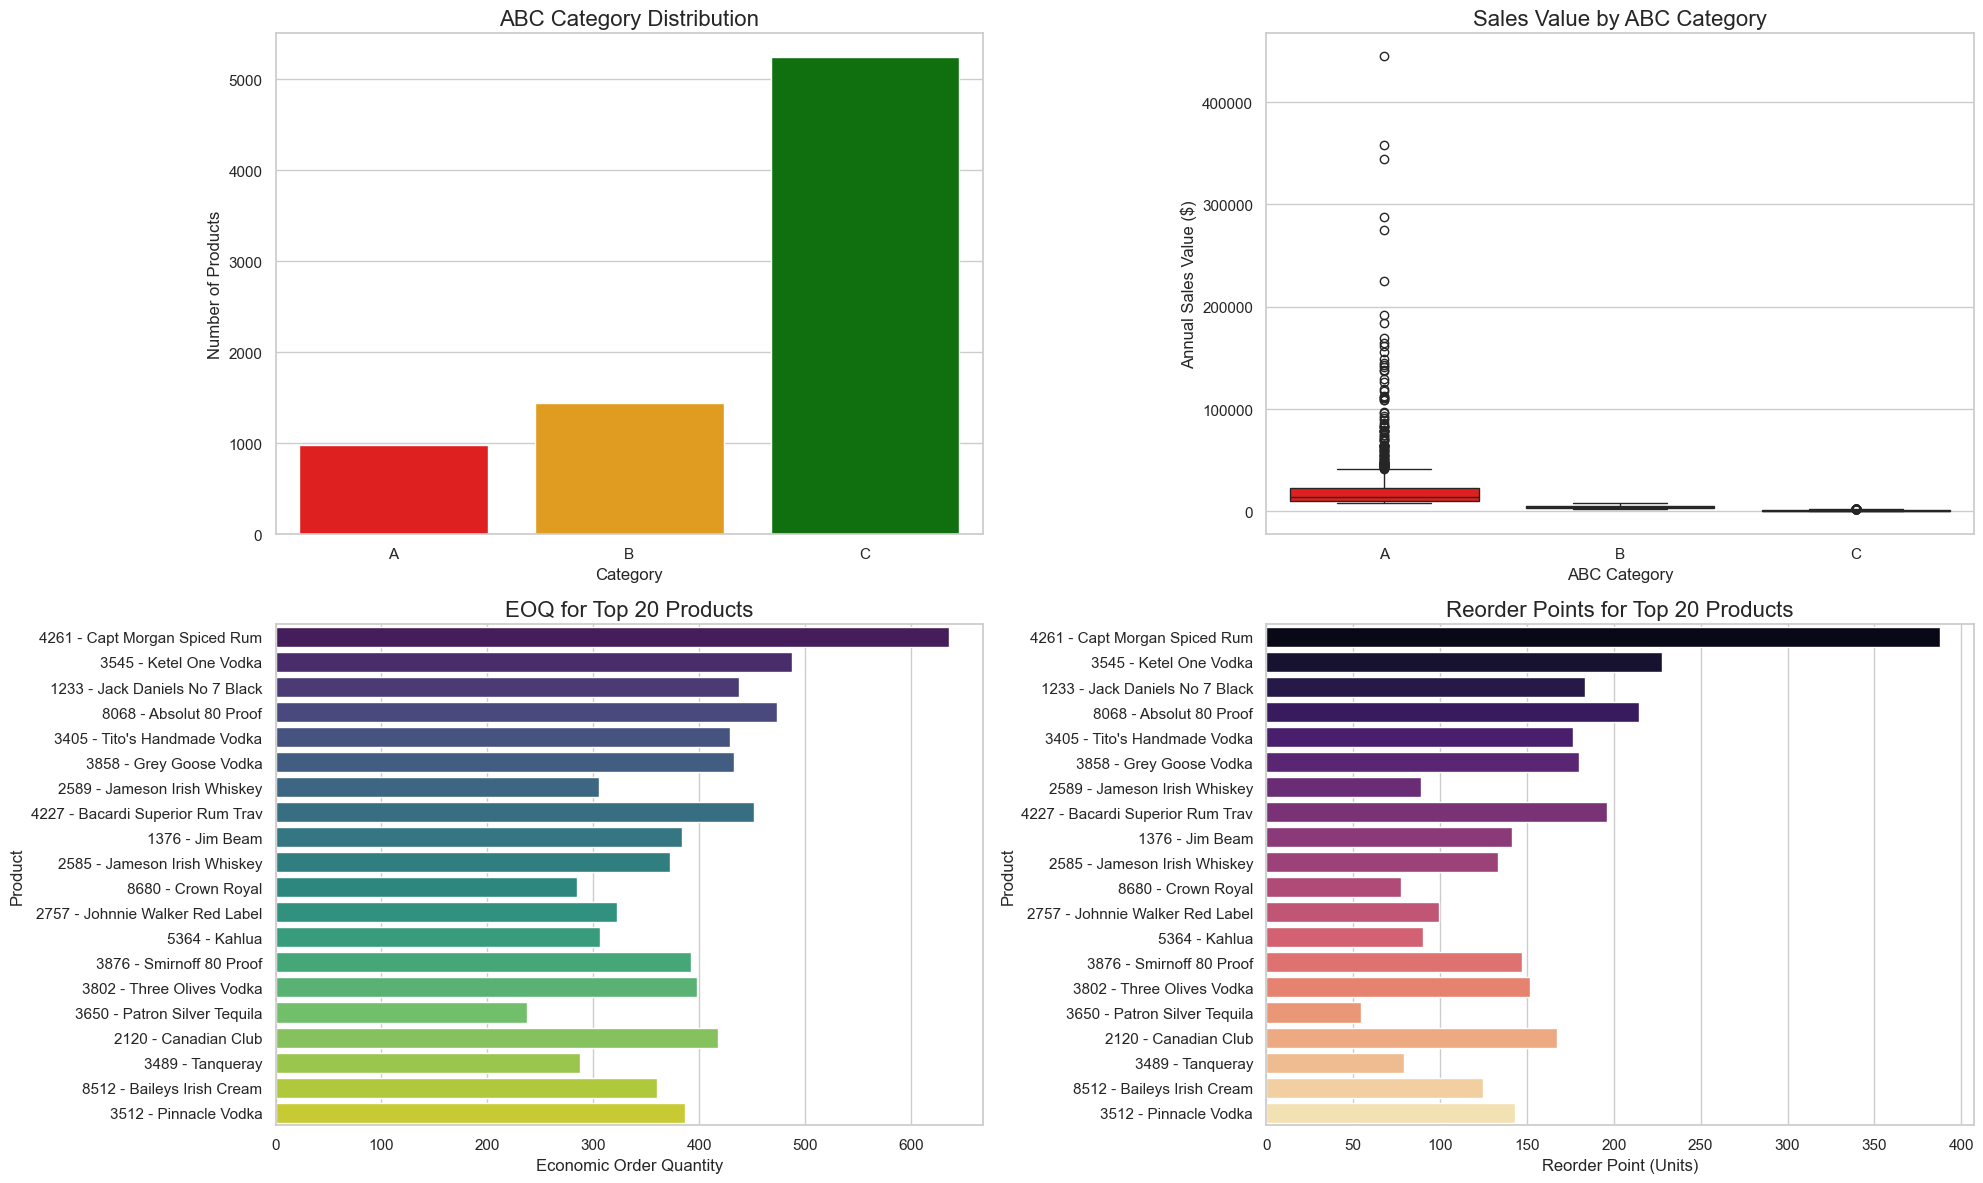

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 20 products by SalesValue
top20 = product_sales.sort_values(by='SalesValue', ascending=False).head(20)
top20['Brand'] = top20['Brand'].astype(str)
top20['Description'] = top20['Description'].astype(str)
top20['Product'] = top20['Brand'] + " - " + top20['Description']

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20,12))

# -------------------------------
# 1️⃣ ABC Category Distribution
# -------------------------------
abc_counts = product_sales['ABC'].value_counts().sort_index()
sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['red','orange','green'], ax=axes[0,0])
axes[0,0].set_title("ABC Category Distribution", fontsize=16)
axes[0,0].set_xlabel("Category", fontsize=12)
axes[0,0].set_ylabel("Number of Products", fontsize=12)

# -------------------------------
# 2️⃣ Sales Value by ABC
# -------------------------------
sns.boxplot(data=product_sales, x='ABC', y='SalesValue', palette=['red','orange','green'], ax=axes[0,1])
axes[0,1].set_title("Sales Value by ABC Category", fontsize=16)
axes[0,1].set_xlabel("ABC Category", fontsize=12)
axes[0,1].set_ylabel("Annual Sales Value ($)", fontsize=12)

# -------------------------------
# 3️⃣ EOQ for Top 20 Products
# -------------------------------
sns.barplot(data=top20, x='EOQ', y='Product', palette='viridis', dodge=False, ax=axes[1,0])
axes[1,0].set_title("EOQ for Top 20 Products", fontsize=16)
axes[1,0].set_xlabel("Economic Order Quantity", fontsize=12)
axes[1,0].set_ylabel("Product", fontsize=12)

# -------------------------------
# 4️⃣ Reorder Point for Top 20 Products
# -------------------------------
sns.barplot(data=top20, x='ReorderPoint', y='Product', palette='magma', dodge=False, ax=axes[1,1])
axes[1,1].set_title("Reorder Points for Top 20 Products", fontsize=16)
axes[1,1].set_xlabel("Reorder Point (Units)", fontsize=12)
axes[1,1].set_ylabel("Product", fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
!pip install prophet


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.1 MB 1.2 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.1 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.1 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/12.1 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/12.1 MB 1.1 MB/s eta 0:00:10
   ------ --------------------------------- 1.8/12.1 MB 1.0 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.1 MB 1.0 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.1 MB 991.3 kB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.1 MB 991.3 kB/s eta 0:00:10
   -------- ----

In [27]:
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


C:\Users\91999\AppData\Local\Temp\ipykernel_280\3824848966.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()
22:21:40 - cmdstanpy - INFO - Chain [1] start processing
22:21:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\91999\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


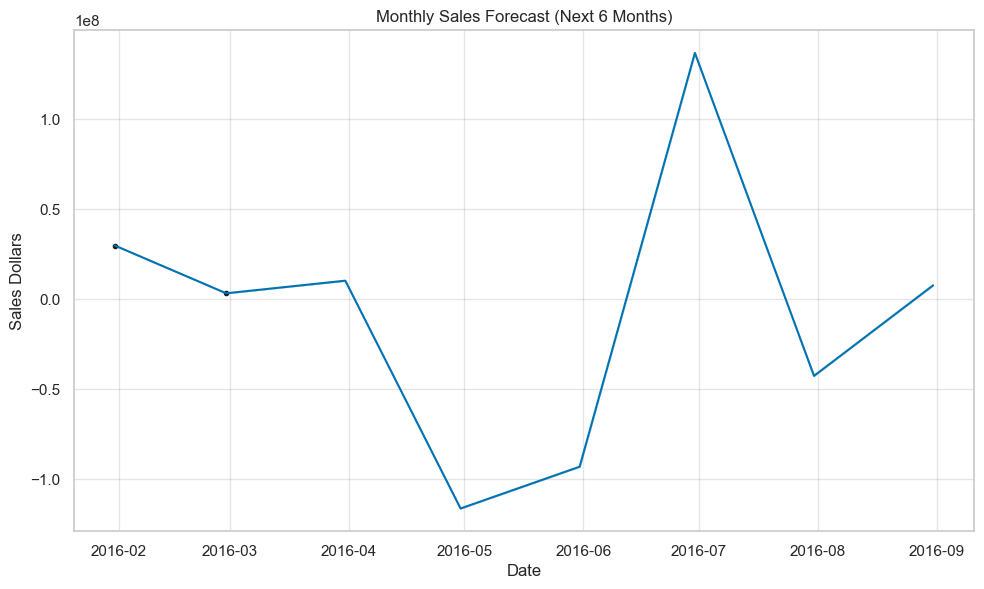

In [28]:
# Install Prophet if not already installed
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Use the sales dataset
sales_df = dfs['sales'].copy()

# Convert SalesDate to datetime
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')

# Aggregate monthly sales
monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'SalesDate':'ds', 'SalesDollars':'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(monthly_sales)

# Forecast next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Monthly Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Dollars")
plt.show()


C:\Users\91999\AppData\Local\Temp\ipykernel_280\518319740.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')


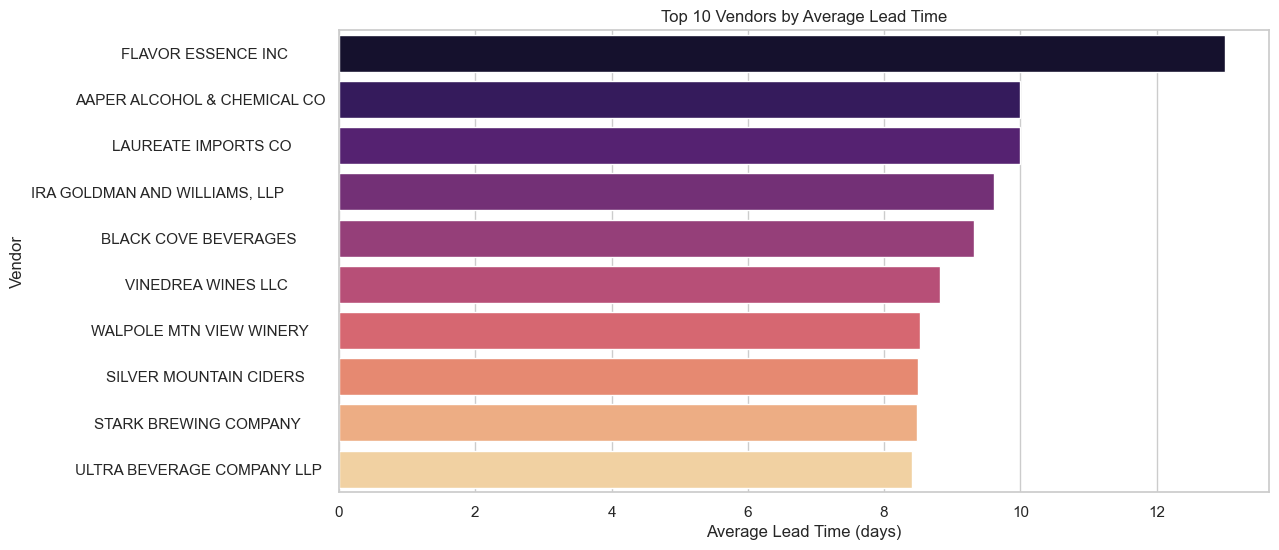

In [29]:
# Use purchases dataset
purchases_df = dfs['purchases'].copy()

# Convert dates to datetime
purchases_df['PODate'] = pd.to_datetime(purchases_df['PODate'], errors='coerce')
purchases_df['ReceivingDate'] = pd.to_datetime(purchases_df['ReceivingDate'], errors='coerce')

# Calculate lead time in days
purchases_df['LeadTime'] = (purchases_df['ReceivingDate'] - purchases_df['PODate']).dt.days

# Average lead time per Vendor
vendor_lead_time = purchases_df.groupby('VendorName')['LeadTime'].mean().reset_index().sort_values('LeadTime', ascending=False)

# Plot top 10 slowest vendors
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')
plt.title("Top 10 Vendors by Average Lead Time")
plt.xlabel("Average Lead Time (days)")
plt.ylabel("Vendor")
plt.show()


In [30]:
import numpy as np

# Example: calculate daily demand per product
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')
daily_sales = sales_df.groupby(['InventoryId', 'SalesDate'])['SalesQuantity'].sum().reset_index()

# Compute mean & std dev of daily demand per product
demand_stats = daily_sales.groupby('InventoryId')['SalesQuantity'].agg(['mean','std']).reset_index()
demand_stats = demand_stats.rename(columns={'mean':'avg_daily_demand', 'std':'std_daily_demand'})

# Merge with lead time per product from purchases dataset
purchases_df['ReceivingDate'] = pd.to_datetime(purchases_df['ReceivingDate'], errors='coerce')
purchases_df['PODate'] = pd.to_datetime(purchases_df['PODate'], errors='coerce')
purchases_df['LeadTime'] = (purchases_df['ReceivingDate'] - purchases_df['PODate']).dt.days

lead_time_stats = purchases_df.groupby('InventoryId')['LeadTime'].mean().reset_index()
demand_stats = demand_stats.merge(lead_time_stats, on='InventoryId', how='left')

# Safety stock with z = 1.65 (95% service level)
z = 1.65
demand_stats['SafetyStock'] = z * demand_stats['std_daily_demand'] * np.sqrt(demand_stats['LeadTime'])

demand_stats[['InventoryId', 'avg_daily_demand', 'std_daily_demand', 'LeadTime', 'SafetyStock']].head()


,InventoryId,avg_daily_demand,std_daily_demand,LeadTime,SafetyStock
0,10_HORNSEY_1000,1.000000,NaN,NaN,NaN
1,10_HORNSEY_1001,3.666667,1.527525,5.5,5.910901
2,10_HORNSEY_10030,2.000000,NaN,9.5,NaN
3,10_HORNSEY_1005,1.000000,0.000000,NaN,NaN
4,10_HORNSEY_10057,12.000000,NaN,9.0,NaN


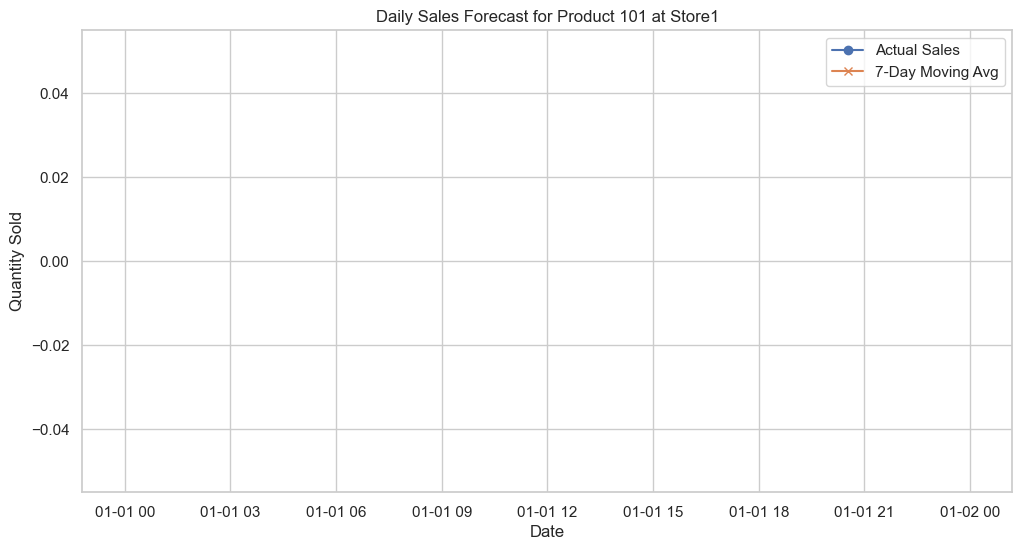

In [31]:
# Daily sales per product-store
daily_sales_store = sales_df.groupby(['Store','InventoryId','SalesDate'])['SalesQuantity'].sum().reset_index()

# Compute 7-day rolling average as simple forecast
daily_sales_store['7day_MA'] = daily_sales_store.groupby(['Store','InventoryId'])['SalesQuantity'].transform(lambda x: x.rolling(7).mean())

# Example plot for one product-store
sample = daily_sales_store[(daily_sales_store['Store']=='Store1') & (daily_sales_store['InventoryId']==101)]
plt.figure(figsize=(12,6))
plt.plot(sample['SalesDate'], sample['SalesQuantity'], marker='o', label='Actual Sales')
plt.plot(sample['SalesDate'], sample['7day_MA'], marker='x', label='7-Day Moving Avg')
plt.title("Daily Sales Forecast for Product 101 at Store1")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()


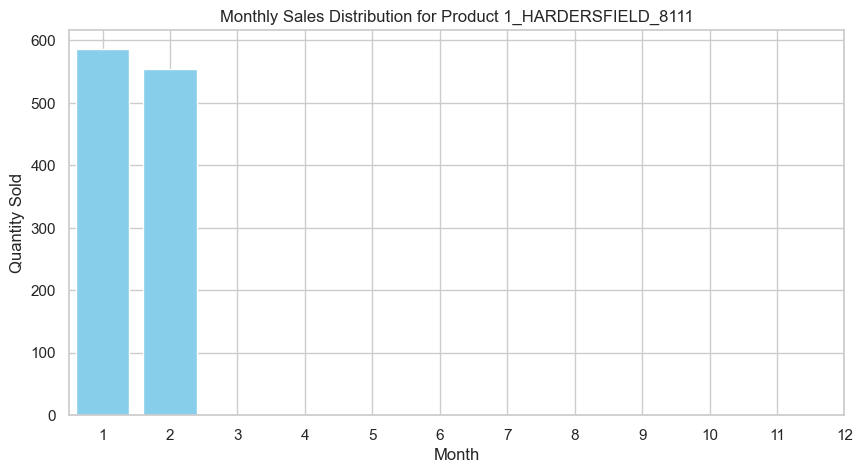

In [32]:
# Extract month from SalesDate
sales_df['Month'] = sales_df['SalesDate'].dt.month

# Aggregate sales per month
monthly_product_sales = sales_df.groupby(['InventoryId','Month'])['SalesQuantity'].sum().reset_index()

# Example: top product seasonality
top_product_id = sales_df.groupby('InventoryId')['SalesQuantity'].sum().idxmax()
top_product_sales = monthly_product_sales[monthly_product_sales['InventoryId']==top_product_id]

plt.figure(figsize=(10,5))
plt.bar(top_product_sales['Month'], top_product_sales['SalesQuantity'], color='skyblue')
plt.xticks(range(1,13))
plt.title(f"Monthly Sales Distribution for Product {top_product_id}")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.show()


,Store,Product,Month,SalesDollars,MA_3,Mean,Std,SeasonalPeak
4560,1,5628 - Baja Rosa Strawberry Liqueur,2016-01-01,59.94,59.94,59.94,0.0,True
21010,10,12944 - Middle Sister Rebel Red,2016-01-01,59.94,59.94,59.94,0.0,True
21039,10,13268 - Backhouse Chard,2016-01-01,41.94,41.94,41.94,0.0,True
21987,10,2131 - Jack Daniels No 7 Black Trav,2016-01-01,220.83,220.83,220.83,0.0,True
22334,10,2445 - Seagrams VO,2016-01-01,107.91,107.91,107.91,0.0,True
22970,10,3085 - Absolut Mini Bar 5/50mls,2016-01-01,179.70,179.70,179.70,0.0,True
23054,10,3158 - Pinnacle Tropical Punch,2016-01-01,254.85,254.85,254.85,0.0,True
28431,11,34647 - Terrazas Alto Malbec Argn,2016-01-01,254.70,254.70,254.70,0.0,True
31649,12,2894 - Scoresby Rare,2016-01-01,251.86,251.86,251.86,0.0,True
37277,14,3246 - Bentley's Vodka,2016-01-01,1353.66,1353.66,1353.66,0.0,True


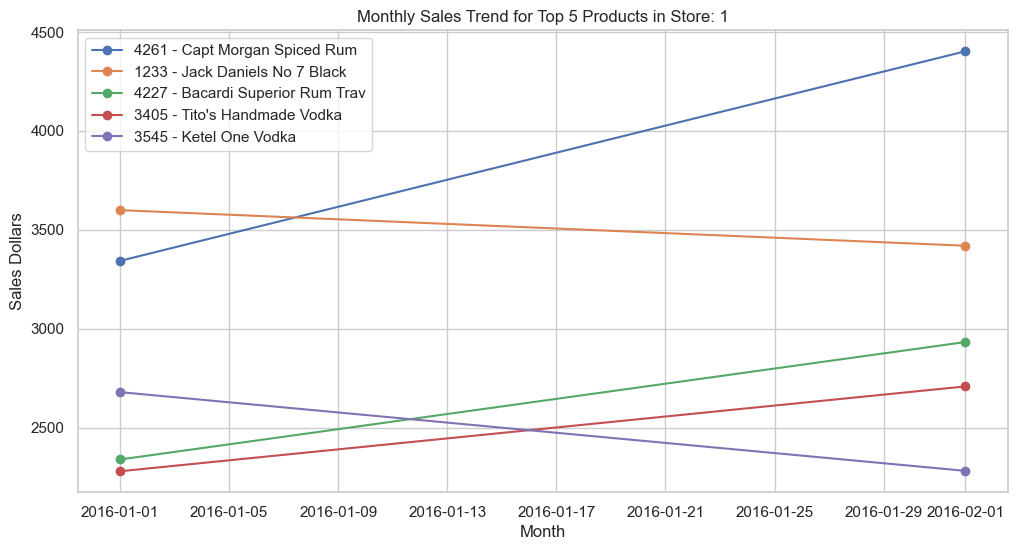

In [34]:
# ----------------------------
# Section 11: Product-Store Demand Forecast & Seasonal Peaks
# ----------------------------

# Ensure SalesDate is datetime
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')

# Aggregate monthly sales per Product + Store
sales_df['Month'] = sales_df['SalesDate'].dt.to_period('M')
sales_df['Product'] = sales_df['Brand'].astype(str) + " - " + sales_df['Description'].astype(str)

monthly_sales_ps = sales_df.groupby(['Store','Product','Month'])['SalesDollars'].sum().reset_index()
monthly_sales_ps['Month'] = monthly_sales_ps['Month'].dt.to_timestamp()

# Compute 3-month rolling average for trend smoothing
monthly_sales_ps['MA_3'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Identify seasonal peaks: months with sales > mean + 1 std deviation
monthly_sales_ps['Mean'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('mean')
monthly_sales_ps['Std'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('std')
monthly_sales_ps['SeasonalPeak'] = monthly_sales_ps['SalesDollars'] > (monthly_sales_ps['Mean'] + monthly_sales_ps['Std'])

# Display sample peaks
peaks = monthly_sales_ps[monthly_sales_ps['SeasonalPeak']].sort_values(['Store','Product','Month'])
display(peaks.head(20))

# Example visualization: one store, top 5 products
store_name = monthly_sales_ps['Store'].unique()[0]
top_products_store = monthly_sales_ps[monthly_sales_ps['Store']==store_name].groupby('Product')['SalesDollars'].sum().nlargest(5).index

plt.figure(figsize=(12,6))
for product in top_products_store:
    df_plot = monthly_sales_ps[(monthly_sales_ps['Store']==store_name) & (monthly_sales_ps['Product']==product)]
    plt.plot(df_plot['Month'], df_plot['SalesDollars'], marker='o', label=product)
plt.title(f"Monthly Sales Trend for Top 5 Products in Store: {store_name}")
plt.xlabel("Month")
plt.ylabel("Sales Dollars")
plt.legend()
plt.show()


Files in folder: ['2017PurchasePricesDec.csv', 'BegInvFINAL12312016.csv', 'EndInvFINAL12312016.csv', 'InvoicePurchases12312016.csv', 'PurchasesFINAL12312016.csv', 'SalesFINAL12312016.csv']

PURCHASE_PRICES — 12261 rows × 9 columns


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Missing values:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

BEGIN_INVENTORY — 206529 rows × 9 columns


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


Missing values:
 InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

END_INVENTORY — 224489 rows × 9 columns


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


Missing values:
 InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

INVOICE_PURCHASES — 5543 rows × 10 columns


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


Missing values:
 VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

PURCHASES — 2372474 rows × 16 columns


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


Missing values:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

SALES — 1048575 rows × 14 columns


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


Missing values:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


C:\Users\91999\AppData\Local\Temp\ipykernel_280\1646388382.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()


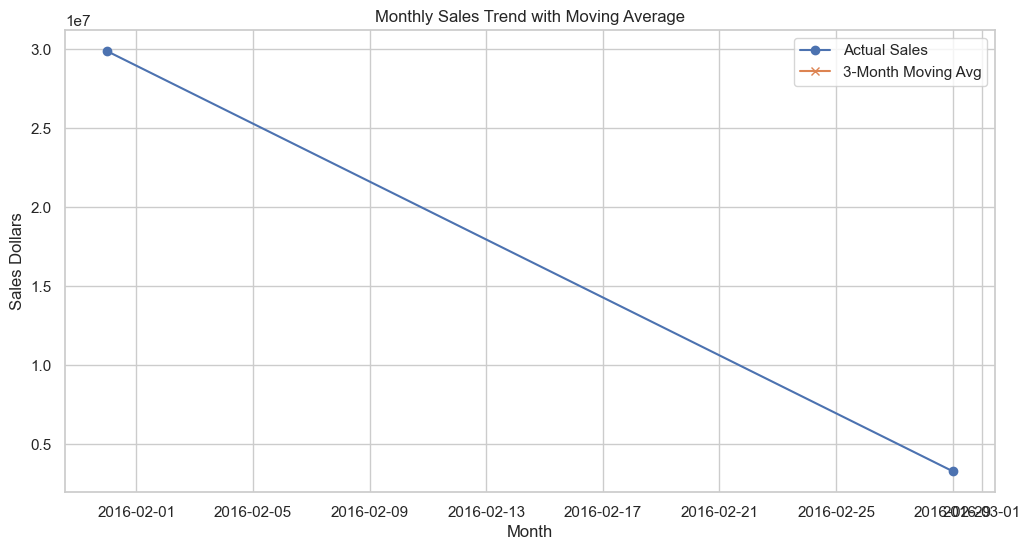

C:\Users\91999\AppData\Local\Temp\ipykernel_280\1646388382.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')


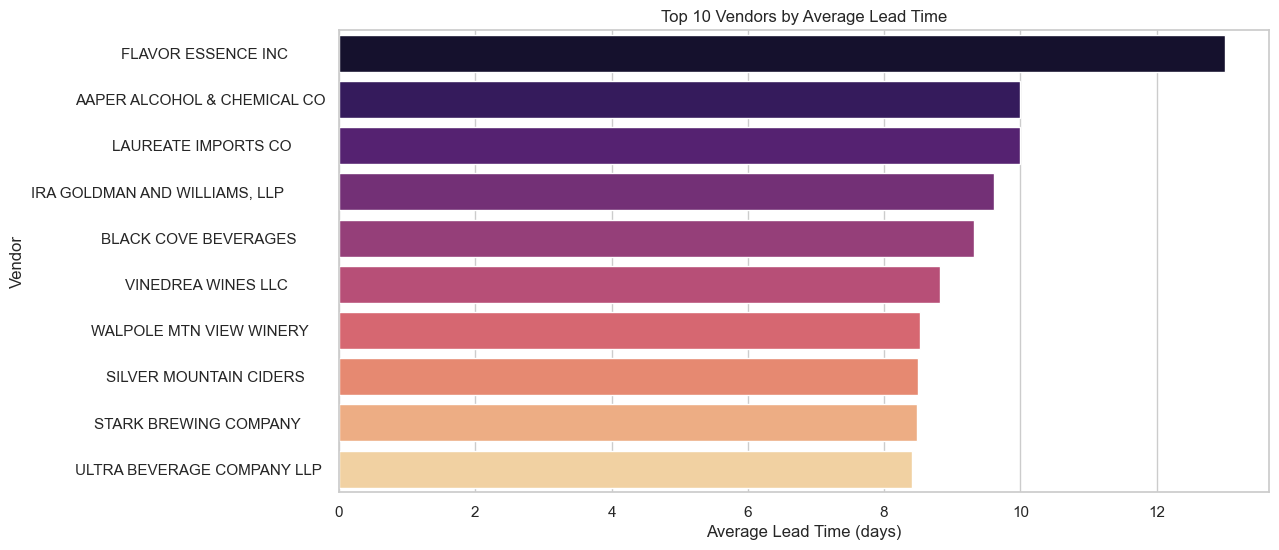

C:\Users\91999\AppData\Local\Temp\ipykernel_280\1646388382.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='SalesDollars', y='Product', palette='viridis')


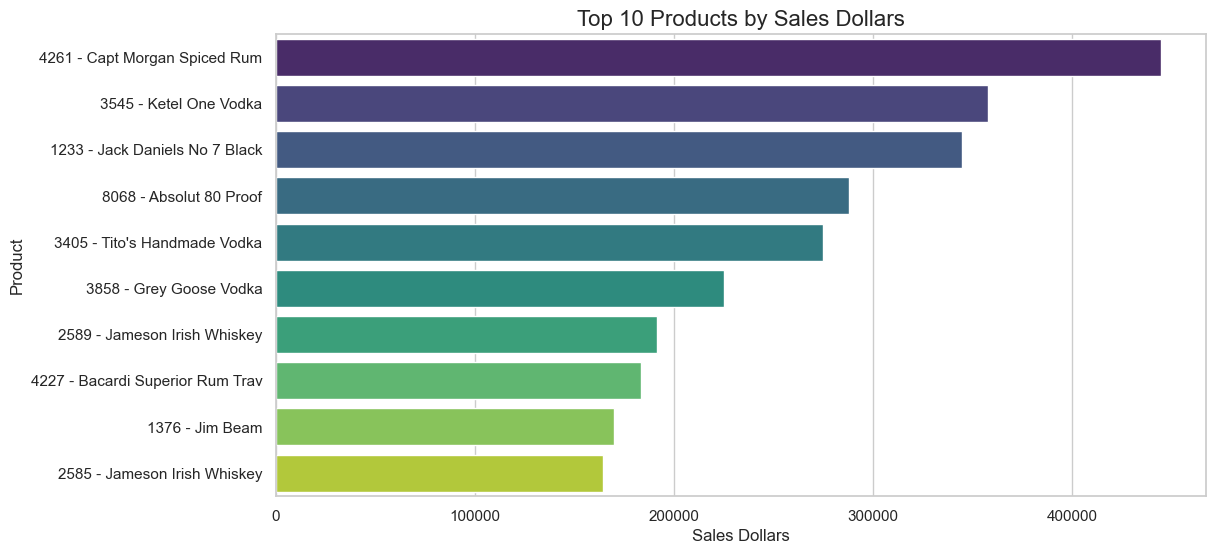

,Store,Product,Month,SalesDollars,MA_3,Mean,Std,SeasonalPeak
4560,1,5628 - Baja Rosa Strawberry Liqueur,2016-01-01,59.94,59.94,59.94,0.0,True
21010,10,12944 - Middle Sister Rebel Red,2016-01-01,59.94,59.94,59.94,0.0,True
21039,10,13268 - Backhouse Chard,2016-01-01,41.94,41.94,41.94,0.0,True
21987,10,2131 - Jack Daniels No 7 Black Trav,2016-01-01,220.83,220.83,220.83,0.0,True
22334,10,2445 - Seagrams VO,2016-01-01,107.91,107.91,107.91,0.0,True
22970,10,3085 - Absolut Mini Bar 5/50mls,2016-01-01,179.70,179.70,179.70,0.0,True
23054,10,3158 - Pinnacle Tropical Punch,2016-01-01,254.85,254.85,254.85,0.0,True
28431,11,34647 - Terrazas Alto Malbec Argn,2016-01-01,254.70,254.70,254.70,0.0,True
31649,12,2894 - Scoresby Rare,2016-01-01,251.86,251.86,251.86,0.0,True
37277,14,3246 - Bentley's Vodka,2016-01-01,1353.66,1353.66,1353.66,0.0,True


In [38]:
# ============================
# Slooze Take-Home Challenge
# Data Science / Analytics
# ============================

# ----------------------------
# 1️⃣ Imports
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# ----------------------------
# 2️⃣ Data Path & Load
# ----------------------------
# Update this to your folder containing all 6 CSVs
data_path = r"C:\Users\91999\.cache\kagglehub\datasets\sloozecareers\slooze-challenge\versions\1\slooze_challenge"

# List files to confirm
print("Files in folder:", os.listdir(data_path))

# CSV filenames
files = {
    "purchase_prices": "2017PurchasePricesDec.csv",
    "begin_inventory": "BegInvFINAL12312016.csv",
    "end_inventory": "EndInvFINAL12312016.csv",
    "invoice_purchases": "InvoicePurchases12312016.csv",
    "purchases": "PurchasesFINAL12312016.csv",
    "sales": "SalesFINAL12312016.csv",
}

# Load CSVs into dict of DataFrames
dfs = {name: pd.read_csv(os.path.join(data_path, filename)) for name, filename in files.items()}

# ----------------------------
# 3️⃣ Data Overview
# ----------------------------
for name, df in dfs.items():
    print(f"\n{name.upper()} — {df.shape[0]} rows × {df.shape[1]} columns")
    display(df.head())
    print("Missing values:\n", df.isnull().sum())

# ----------------------------
# 4️⃣ Demand Forecasting (Monthly Sales Trend)
# ----------------------------
sales_df = dfs['sales'].copy()
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')

monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()
monthly_sales['MA_3'] = monthly_sales['SalesDollars'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['SalesDate'], monthly_sales['SalesDollars'], marker='o', label='Actual Sales')
plt.plot(monthly_sales['SalesDate'], monthly_sales['MA_3'], marker='x', label='3-Month Moving Avg')
plt.title("Monthly Sales Trend with Moving Average")
plt.xlabel("Month")
plt.ylabel("Sales Dollars")
plt.legend()
plt.show()

# ----------------------------
# 5️⃣ ABC Analysis
# ----------------------------
inventory = dfs['end_inventory'].copy()
inventory['SalesValue'] = inventory['onHand'] * inventory['Price']

inventory = inventory.sort_values('SalesValue', ascending=False)
total_value = inventory['SalesValue'].sum()
inventory['CumulativePerc'] = inventory['SalesValue'].cumsum() / total_value * 100

def classify(row):
    if row['CumulativePerc'] <= 70:
        return 'A'
    elif row['CumulativePerc'] <= 90:
        return 'B'
    else:
        return 'C'

inventory['ABC'] = inventory.apply(classify, axis=1)

# Save ABC output for submission
inventory[['Brand','Description','SalesValue','ABC']].to_csv("ABC_analysis.csv", index=False)

# ----------------------------
# 6️⃣ EOQ & Reorder Point
# ----------------------------
inventory['AnnualDemand'] = inventory['SalesValue']  # approximation
S = 50  # ordering cost per order
H = 10  # holding cost per unit

inventory['EOQ'] = np.sqrt((2 * inventory['AnnualDemand'] * S)/H)

# Lead time example for Reorder Point
z = 1.65  # 95% service level
inventory['DailyDemand'] = inventory['AnnualDemand']/365
inventory['StdDevDailyDemand'] = inventory['DailyDemand']*0.1  # approximate
inventory['SafetyStock'] = z * inventory['StdDevDailyDemand'] * np.sqrt(7)  # 7-day lead time example
inventory['ReorderPoint'] = (inventory['DailyDemand']*7) + inventory['SafetyStock']

inventory.to_csv("Inventory_EOQ_Reorder.csv", index=False)

# ----------------------------
# 7️⃣ Lead Time Analysis
# ----------------------------
purchases_df = dfs['purchases'].copy()
purchases_df['ReceivingDate'] = pd.to_datetime(purchases_df['ReceivingDate'], errors='coerce')
purchases_df['PODate'] = pd.to_datetime(purchases_df['PODate'], errors='coerce')
purchases_df['LeadTime'] = (purchases_df['ReceivingDate'] - purchases_df['PODate']).dt.days

vendor_lead_time = purchases_df.groupby('VendorName')['LeadTime'].mean().reset_index().sort_values('LeadTime', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')
plt.title("Top 10 Vendors by Average Lead Time")
plt.xlabel("Average Lead Time (days)")
plt.ylabel("Vendor")
plt.show()

vendor_lead_time.to_csv("Vendor_LeadTime.csv", index=False)

# ----------------------------
# 8️⃣ Top Products by Sales Dollars
# ----------------------------
top_products = sales_df.groupby(['Brand', 'Description'])['SalesDollars'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products['Product'] = top_products['Brand'].astype(str) + " - " + top_products['Description'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='SalesDollars', y='Product', palette='viridis')
plt.title("Top 10 Products by Sales Dollars", fontsize=16)
plt.xlabel("Sales Dollars", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()

top_products.to_csv("Top_Products_Sales.csv", index=False)

# ----------------------------
# 9️⃣ Seasonal Peaks per Store/Product
# ----------------------------
sales_df['Month'] = sales_df['SalesDate'].dt.to_period('M')
sales_df['Product'] = sales_df['Brand'].astype(str) + " - " + sales_df['Description'].astype(str)

monthly_sales_ps = sales_df.groupby(['Store','Product','Month'])['SalesDollars'].sum().reset_index()
monthly_sales_ps['Month'] = monthly_sales_ps['Month'].dt.to_timestamp()
monthly_sales_ps['MA_3'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Seasonal peaks: Sales > mean + 1 std deviation
monthly_sales_ps['Mean'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('mean')
monthly_sales_ps['Std'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('std')
monthly_sales_ps['SeasonalPeak'] = monthly_sales_ps['SalesDollars'] > (monthly_sales_ps['Mean'] + monthly_sales_ps['Std'])

peaks = monthly_sales_ps[monthly_sales_ps['SeasonalPeak']].sort_values(['Store','Product','Month'])
peaks.to_csv("Seasonal_Peaks.csv", index=False)
display(peaks.head(20))


In [39]:
import numpy as np

# Example: calculate daily demand per product
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')
daily_sales = sales_df.groupby(['InventoryId', 'SalesDate'])['SalesQuantity'].sum().reset_index()

# Compute mean & std dev of daily demand per product
demand_stats = daily_sales.groupby('InventoryId')['SalesQuantity'].agg(['mean','std']).reset_index()
demand_stats = demand_stats.rename(columns={'mean':'avg_daily_demand', 'std':'std_daily_demand'})

# Merge with lead time per product from purchases dataset
purchases_df['ReceivingDate'] = pd.to_datetime(purchases_df['ReceivingDate'], errors='coerce')
purchases_df['PODate'] = pd.to_datetime(purchases_df['PODate'], errors='coerce')
purchases_df['LeadTime'] = (purchases_df['ReceivingDate'] - purchases_df['PODate']).dt.days

lead_time_stats = purchases_df.groupby('InventoryId')['LeadTime'].mean().reset_index()
demand_stats = demand_stats.merge(lead_time_stats, on='InventoryId', how='left')

# Safety stock with z = 1.65 (95% service level)
z = 1.65
demand_stats['SafetyStock'] = z * demand_stats['std_daily_demand'] * np.sqrt(demand_stats['LeadTime'])

demand_stats[['InventoryId', 'avg_daily_demand', 'std_daily_demand', 'LeadTime', 'SafetyStock']].head()

,InventoryId,avg_daily_demand,std_daily_demand,LeadTime,SafetyStock
0,10_HORNSEY_1000,1.000000,NaN,NaN,NaN
1,10_HORNSEY_1001,3.666667,1.527525,5.5,5.910901
2,10_HORNSEY_10030,2.000000,NaN,9.5,NaN
3,10_HORNSEY_1005,1.000000,0.000000,NaN,NaN
4,10_HORNSEY_10057,12.000000,NaN,9.0,NaN


In [40]:
ls data


 Volume in drive C is Windows
 Volume Serial Number is 9048-2C9E

 Directory of C:\Users\91999\Downloads\slooze\data

22-10-2025  23:43    <DIR>          .
23-10-2025  00:11    <DIR>          ..
22-10-2025  17:58         1,157,603 2017PurchasePricesDec.csv
22-10-2025  17:58        19,306,233 BegInvFINAL12312016.csv
22-10-2025  17:58        21,004,265 EndInvFINAL12312016.csv
22-10-2025  17:58           591,021 InvoicePurchases12312016.csv
22-10-2025  17:58       401,753,821 PurchasesFINAL12312016.csv
22-10-2025  17:58       127,863,044 SalesFINAL12312016.csv
               6 File(s)    571,675,987 bytes
               2 Dir(s)  353,065,713,664 bytes free


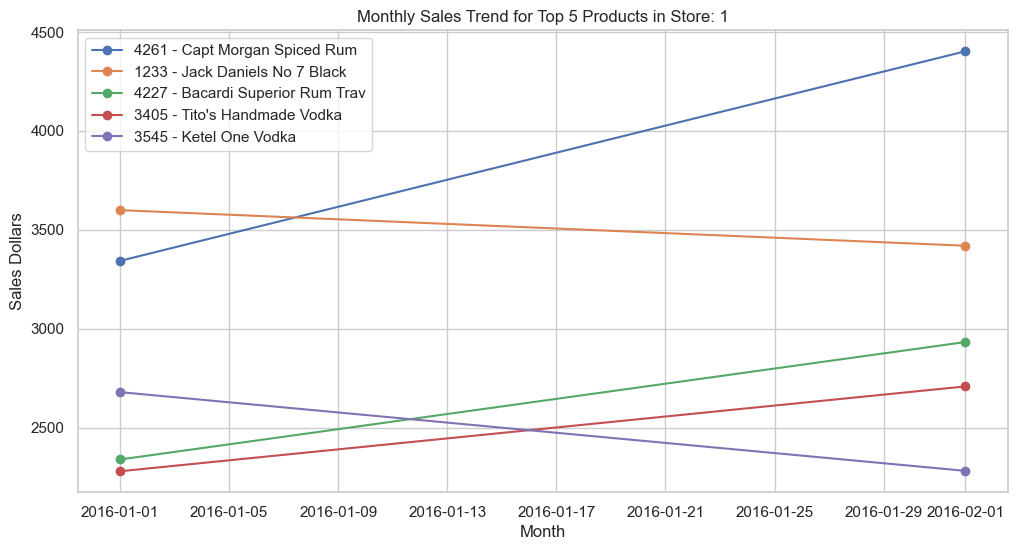

In [41]:
store_name = monthly_sales_ps['Store'].unique()[0]
top_products_store = monthly_sales_ps[monthly_sales_ps['Store']==store_name].groupby('Product')['SalesDollars'].sum().nlargest(5).index

plt.figure(figsize=(12,6))
for product in top_products_store:
    df_plot = monthly_sales_ps[(monthly_sales_ps['Store']==store_name) & (monthly_sales_ps['Product']==product)]
    plt.plot(df_plot['Month'], df_plot['SalesDollars'], marker='o', label=product)
plt.title(f"Monthly Sales Trend for Top 5 Products in Store: {store_name}")
plt.xlabel("Month")
plt.ylabel("Sales Dollars")
plt.legend()
plt.show()



PURCHASE_PRICES — 12261 rows × 9 columns


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Missing values:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

BEGIN_INVENTORY — 206529 rows × 9 columns


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


Missing values:
 InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

END_INVENTORY — 224489 rows × 9 columns


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


Missing values:
 InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

INVOICE_PURCHASES — 5543 rows × 10 columns


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


Missing values:
 VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

PURCHASES — 2372474 rows × 16 columns


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


Missing values:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

SALES — 1048575 rows × 14 columns


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


Missing values:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


C:\Users\91999\AppData\Local\Temp\ipykernel_280\4029016481.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()


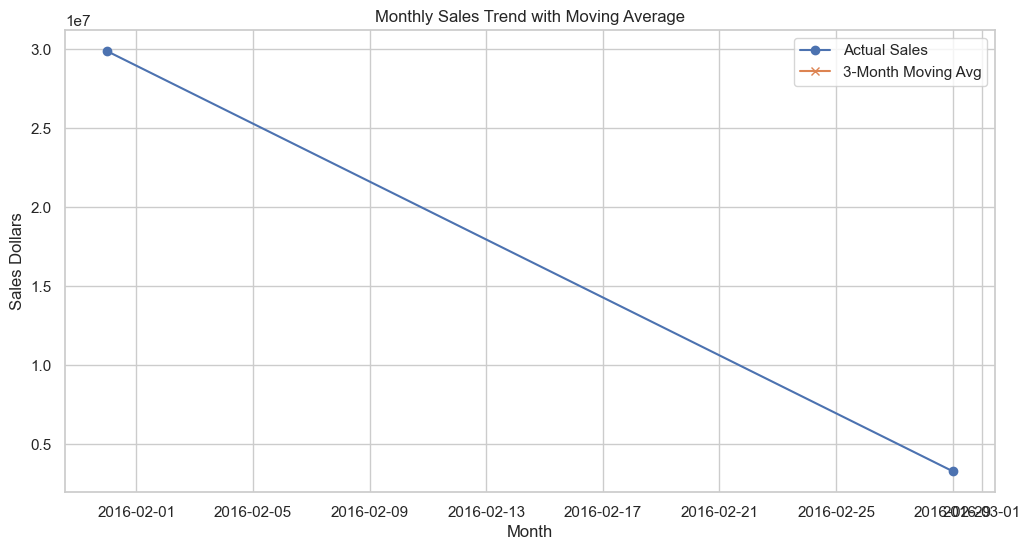

,Brand,Description,SalesValue,ABC
123623,1233,Jack Daniels No 7 Black,43597.54,A
182493,2753,Johnnie Walker Black Label,38993.50,A
124408,3545,Ketel One Vodka,35268.24,A
124350,3405,Tito's Handmade Vodka,33744.36,A
125473,8068,Absolut 80 Proof,29902.77,A
124023,2589,Jameson Irish Whiskey,29708.18,A
182496,2757,Johnnie Walker Red Label,29076.97,A
80662,3405,Tito's Handmade Vodka,28091.31,A
124105,2753,Johnnie Walker Black Label,26515.58,A
63272,126,Grey Goose Vodka,26511.16,A


C:\Users\91999\AppData\Local\Temp\ipykernel_280\4029016481.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')


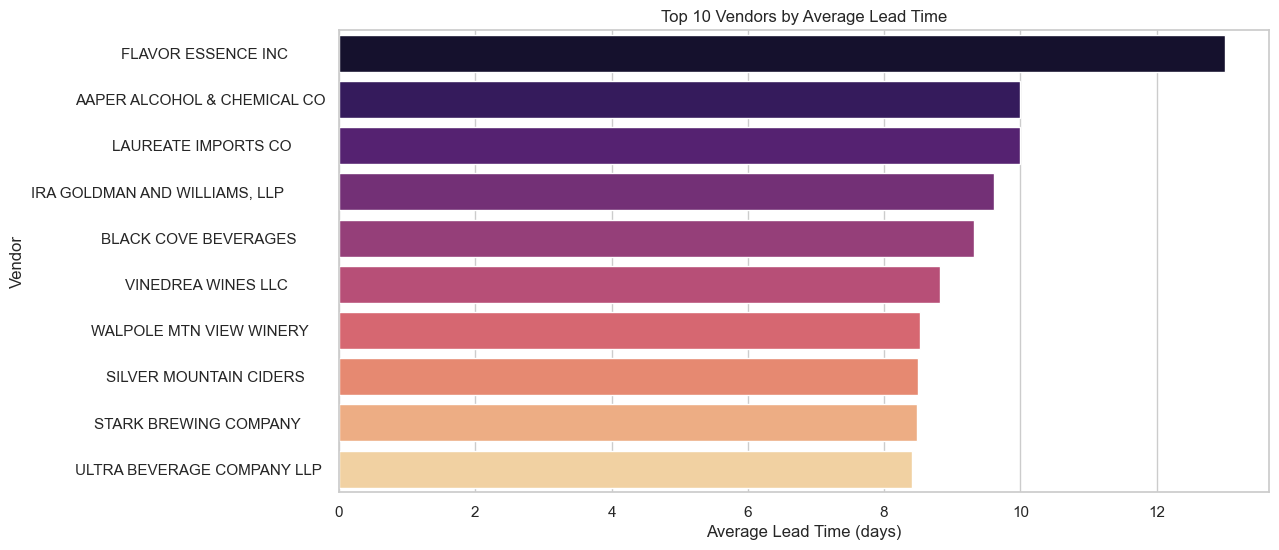

C:\Users\91999\AppData\Local\Temp\ipykernel_280\4029016481.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='SalesDollars', y='Product', palette='viridis')


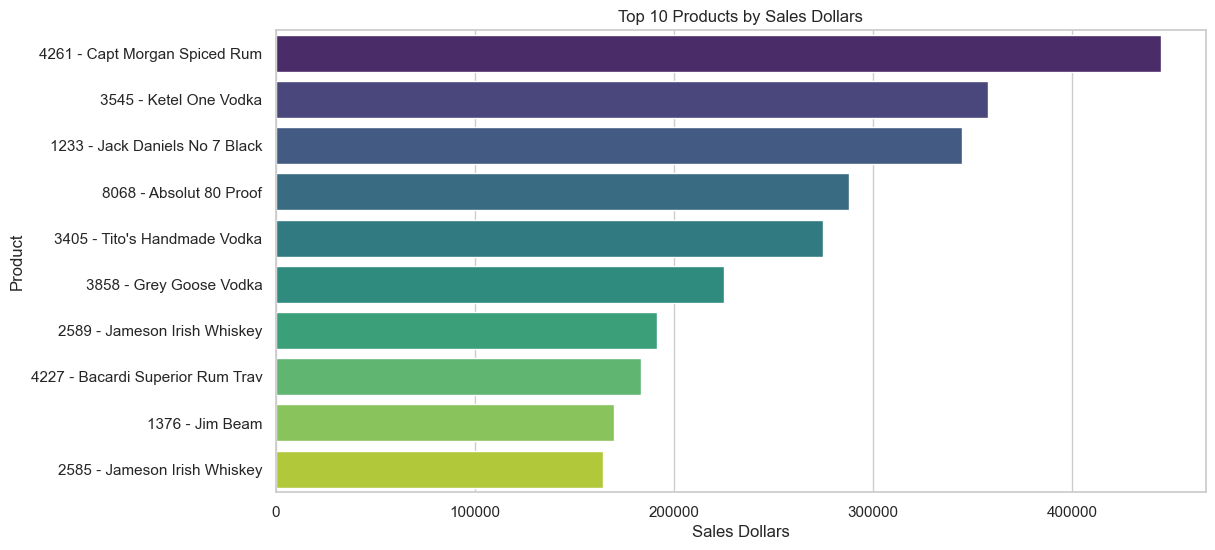

C:\Users\91999\AppData\Local\Temp\ipykernel_280\4029016481.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='EOQ', y='Product', palette='viridis')


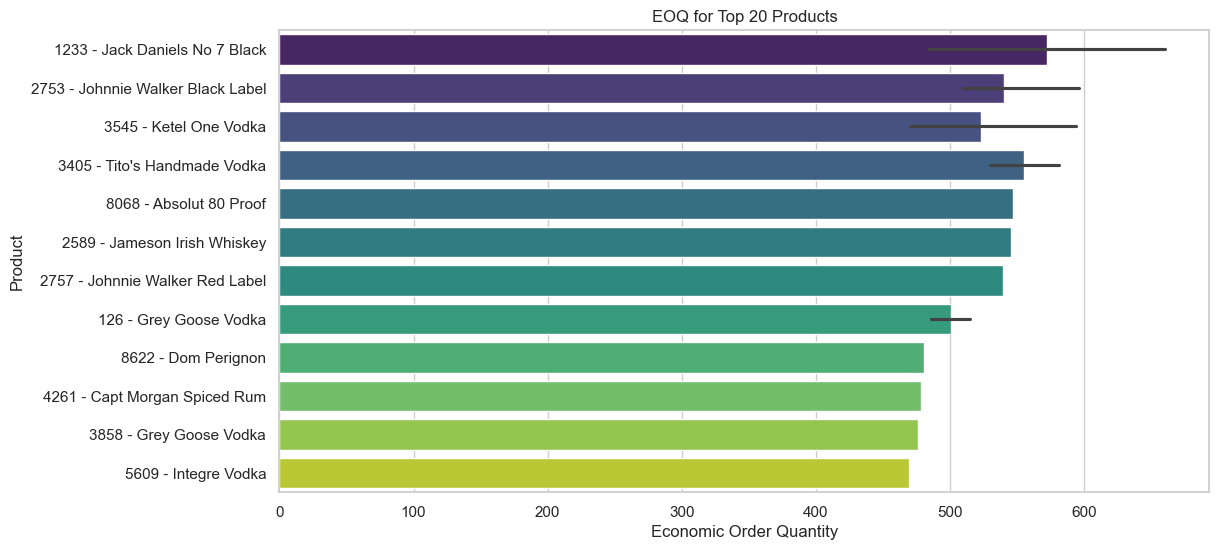

,Store,Product,Month,SalesDollars,MA_3,Mean,Std,SeasonalPeak
4560,1,5628 - Baja Rosa Strawberry Liqueur,2016-01-01,59.94,59.94,59.94,0.0,True
21010,10,12944 - Middle Sister Rebel Red,2016-01-01,59.94,59.94,59.94,0.0,True
21039,10,13268 - Backhouse Chard,2016-01-01,41.94,41.94,41.94,0.0,True
21987,10,2131 - Jack Daniels No 7 Black Trav,2016-01-01,220.83,220.83,220.83,0.0,True
22334,10,2445 - Seagrams VO,2016-01-01,107.91,107.91,107.91,0.0,True
22970,10,3085 - Absolut Mini Bar 5/50mls,2016-01-01,179.70,179.70,179.70,0.0,True
23054,10,3158 - Pinnacle Tropical Punch,2016-01-01,254.85,254.85,254.85,0.0,True
28431,11,34647 - Terrazas Alto Malbec Argn,2016-01-01,254.70,254.70,254.70,0.0,True
31649,12,2894 - Scoresby Rare,2016-01-01,251.86,251.86,251.86,0.0,True
37277,14,3246 - Bentley's Vodka,2016-01-01,1353.66,1353.66,1353.66,0.0,True


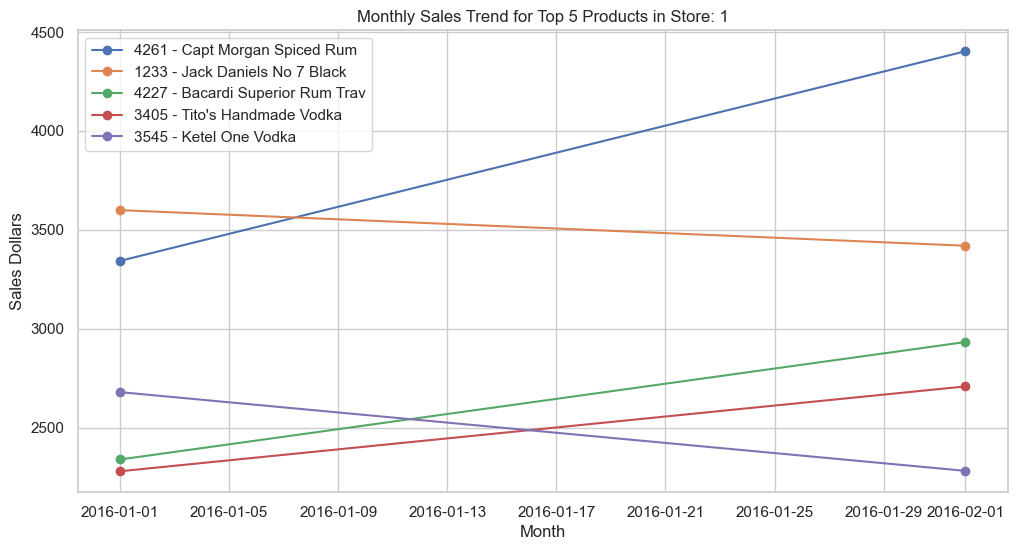

In [43]:
# ============================
# Slooze Take-Home Challenge
# Data Science / Analytics
# ============================

# ----------------------------
# Section 1: Imports
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# ----------------------------
# Section 2: Load Dataset
# ----------------------------
data_path = "data"  # CSV files in ./data folder
output_path = "output"
os.makedirs(output_path, exist_ok=True)

files = {
    "purchase_prices": "2017PurchasePricesDec.csv",
    "begin_inventory": "BegInvFINAL12312016.csv",
    "end_inventory": "EndInvFINAL12312016.csv",
    "invoice_purchases": "InvoicePurchases12312016.csv",
    "purchases": "PurchasesFINAL12312016.csv",
    "sales": "SalesFINAL12312016.csv",
}

# Load all CSVs
dfs = {name: pd.read_csv(os.path.join(data_path, filename)) for name, filename in files.items()}

# ----------------------------
# Section 3: Data Overview
# ----------------------------
for name, df in dfs.items():
    print(f"\n{name.upper()} — {df.shape[0]} rows × {df.shape[1]} columns")
    display(df.head())
    print("Missing values:\n", df.isnull().sum())

# ----------------------------
# Section 4: Demand Forecasting (Monthly Sales Trend)
# ----------------------------
sales_df = dfs['sales'].copy()
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')

monthly_sales = sales_df.groupby(pd.Grouper(key='SalesDate', freq='M'))['SalesDollars'].sum().reset_index()
monthly_sales['MA_3'] = monthly_sales['SalesDollars'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['SalesDate'], monthly_sales['SalesDollars'], marker='o', label='Actual Sales')
plt.plot(monthly_sales['SalesDate'], monthly_sales['MA_3'], marker='x', label='3-Month Moving Avg')
plt.title("Monthly Sales Trend with Moving Average")
plt.xlabel("Month")
plt.ylabel("Sales Dollars")
plt.legend()
plt.show()

# ----------------------------
# Section 5: ABC Analysis
# ----------------------------
inventory = dfs['end_inventory'].copy()
inventory['SalesValue'] = inventory['onHand'] * inventory['Price']
inventory = inventory.sort_values('SalesValue', ascending=False)
total_value = inventory['SalesValue'].sum()
inventory['CumulativePerc'] = inventory['SalesValue'].cumsum() / total_value * 100

def classify(row):
    if row['CumulativePerc'] <= 70:
        return 'A'
    elif row['CumulativePerc'] <= 90:
        return 'B'
    else:
        return 'C'

inventory['ABC'] = inventory.apply(classify, axis=1)
display(inventory[['Brand','Description','SalesValue','ABC']].head(10))

# Export ABC inventory
inventory.to_csv(os.path.join(output_path, "inventory_ABC_EOQ.csv"), index=False)

# ----------------------------
# Section 6: EOQ & Reorder Point
# ----------------------------
inventory['AnnualDemand'] = inventory['SalesValue']  # approximate
S = 50  # ordering cost per order
H = 10  # holding cost per unit
inventory['EOQ'] = np.sqrt((2 * inventory['AnnualDemand'] * S)/H)

# Safety stock & Reorder point
z = 1.65  # 95% service level
inventory['DailyDemand'] = inventory['AnnualDemand']/365
inventory['StdDevDailyDemand'] = inventory['DailyDemand']*0.1  # approximate
inventory['SafetyStock'] = z * inventory['StdDevDailyDemand'] * np.sqrt(7)  # 7-day lead time example
inventory['ReorderPoint'] = (inventory['DailyDemand']*7) + inventory['SafetyStock']

# ----------------------------
# Section 7: Lead Time Analysis
# ----------------------------
purchases_df = dfs['purchases'].copy()
purchases_df['ReceivingDate'] = pd.to_datetime(purchases_df['ReceivingDate'], errors='coerce')
purchases_df['PODate'] = pd.to_datetime(purchases_df['PODate'], errors='coerce')
purchases_df['LeadTime'] = (purchases_df['ReceivingDate'] - purchases_df['PODate']).dt.days

vendor_lead_time = purchases_df.groupby('VendorName')['LeadTime'].mean().reset_index().sort_values('LeadTime', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=vendor_lead_time.head(10), x='LeadTime', y='VendorName', palette='magma')
plt.title("Top 10 Vendors by Average Lead Time")
plt.xlabel("Average Lead Time (days)")
plt.ylabel("Vendor")
plt.show()

# ----------------------------
# Section 8: Top Products by Sales Dollars
# ----------------------------
top_products = sales_df.groupby(['Brand', 'Description'])['SalesDollars'].sum().sort_values(ascending=False).head(10).reset_index()
top_products['Product'] = top_products['Brand'].astype(str) + " - " + top_products['Description'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='SalesDollars', y='Product', palette='viridis')
plt.title("Top 10 Products by Sales Dollars")
plt.xlabel("Sales Dollars")
plt.ylabel("Product")
plt.show()

# ----------------------------
# Section 9: EOQ for Top 20 Products
# ----------------------------
top20 = inventory.sort_values(by='SalesValue', ascending=False).head(20)
top20['Product'] = top20['Brand'].astype(str) + " - " + top20['Description'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=top20, x='EOQ', y='Product', palette='viridis')
plt.title("EOQ for Top 20 Products")
plt.xlabel("Economic Order Quantity")
plt.ylabel("Product")
plt.show()

# ----------------------------
# Section 10: Product-Store Demand Forecast & Seasonal Peaks
# ----------------------------
sales_df['Month'] = sales_df['SalesDate'].dt.to_period('M')
sales_df['Product'] = sales_df['Brand'].astype(str) + " - " + sales_df['Description'].astype(str)

monthly_sales_ps = sales_df.groupby(['Store','Product','Month'])['SalesDollars'].sum().reset_index()
monthly_sales_ps['Month'] = monthly_sales_ps['Month'].dt.to_timestamp()
monthly_sales_ps['MA_3'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Seasonal peaks
monthly_sales_ps['Mean'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('mean')
monthly_sales_ps['Std'] = monthly_sales_ps.groupby(['Store','Product'])['SalesDollars'].transform('std')
monthly_sales_ps['SeasonalPeak'] = monthly_sales_ps['SalesDollars'] > (monthly_sales_ps['Mean'] + monthly_sales_ps['Std'])

peaks = monthly_sales_ps[monthly_sales_ps['SeasonalPeak']].sort_values(['Store','Product','Month'])
display(peaks.head(20))

# Export product-store sales
monthly_sales_ps.to_csv(os.path.join(output_path, "monthly_sales_per_store.csv"), index=False)

# Example visualization: top 5 products for first store
store_name = monthly_sales_ps['Store'].unique()[0]
top_products_store = monthly_sales_ps[monthly_sales_ps['Store']==store_name].groupby('Product')['SalesDollars'].sum().nlargest(5).index

plt.figure(figsize=(12,6))
for product in top_products_store:
    df_plot = monthly_sales_ps[(monthly_sales_ps['Store']==store_name) & (monthly_sales_ps['Product']==product)]
    plt.plot(df_plot['Month'], df_plot['SalesDollars'], marker='o', label=product)
plt.title(f"Monthly Sales Trend for Top 5 Products in Store: {store_name}")
plt.xlabel("Month")
plt.ylabel("Sales Dollars")
plt.legend()
plt.show()

#  ABC Analysis
# ----------------------------
inventory = dfs['end_inventory'].copy()
inventory['SalesValue'] = inventory['onHand'] * inventory['Price']

inventory = inventory.sort_values('SalesValue', ascending=False)
total_value = inventory['SalesValue'].sum()
inventory['CumulativePerc'] = inventory['SalesValue'].cumsum() / total_value * 100

def classify(row):
    if row['CumulativePerc'] <= 70:
        return 'A'
    elif row['CumulativePerc'] <= 90:
        return 'B'
    else:
        return 'C'

inventory['ABC'] = inventory.apply(classify, axis=1)

# Save ABC output for submission
inventory[['Brand','Description','SalesValue','ABC']].to_csv("ABC_analysis.csv", index=False)

# ----------------------------
# Section 11: Insights & Recommendations
# ----------------------------
# 1. Prioritize A-class products for stock accuracy.
# 2. Review vendors with long lead times to reduce delays.
# 3. Maintain safety stock for high-demand items.
# 4. Adjust EOQ and reorder points based on actual demand and costs.
# 5. Seasonal peaks: increase stock in high-demand months.
# 6. Forecast per product/store allows granular planning. 
